In [17]:
import urllib.request
import gzip
import io
import json
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 0: Import data into useable type

# URL Location of the Jeopardy Data
url_get = "http://skeeto.s3.amazonaws.com/share/JEOPARDY_QUESTIONS1.json.gz"

# Decompress GZip file into a json String so that we can then turn into a dataframe for easier access
with urllib.request.urlopen(url_get) as response:
    encoding = response.info().get_param('charset', 'utf8')
    compressed_file = io.BytesIO(response.read())
    decompressed_file = gzip.decompress(compressed_file.read())
    json_str = json.loads(decompressed_file.decode('utf-8'))


In [28]:
# Step 1: Clean imported data and prepare for inspection

# Pandas has methods to turn JSON objects into Dataframes, so we want to convert our String to JSON Object format
questions_dataframe = pd.DataFrame.from_dict(json_str)
# We don't care about the show number since we have an air date
questions_dataframe.drop('show_number', axis=1, inplace=True)
# Some data cleaning is needed to make 'value' only numeric chars. and 
# dates will be treated as the python type.
questions_dataframe['value'] = questions_dataframe['value'].str.replace("$", '')
questions_dataframe['value'] = questions_dataframe['value'].str.replace(",", '')
questions_dataframe['value'] = pd.to_numeric(questions_dataframe['value'])
questions_dataframe['air_date'] = pd.to_datetime(questions_dataframe['air_date'])
questions_dataframe = questions_dataframe.sort_values(by='air_date')

# Print to view clean data
questions_dataframe

,category,air_date,question,value,answer,round
84523,LAKES & RIVERS,1984-09-10,'River mentioned most often in the Bible',100.0,the Jordan,Jeopardy!
84565,THE BIBLE,1984-09-10,"'According to 1st Timothy, it is the ""root of ...",1000.0,the love of money,Double Jeopardy!
84566,'50'S TV,1984-09-10,'Name under which experimenter Don Herbert tau...,1000.0,Mr. Wizard,Double Jeopardy!
84567,NATIONAL LANDMARKS,1984-09-10,'D.C. building shaken by November '83 bomb blast',1000.0,the Capitol,Double Jeopardy!
84568,NOTORIOUS,1984-09-10,"'After the deed, he leaped to the stage shouti...",1000.0,John Wilkes Booth,Double Jeopardy!
...,...,...,...,...,...,...
105947,VISITING THE CITY,2012-01-27,'There's a great opera house on Bennelong Poin...,800.0,Sydney,Jeopardy!
105948,PANTS,2012-01-27,'Tight-fitting pants patterned after those wor...,1400.0,toreador pants,Jeopardy!
105949,CHILD ACTORS,2012-01-27,"'This kid, with a familiar last name, is seen ...",800.0,Jaden Smith,Jeopardy!
105951,LESSER-KNOWN SCIENTISTS,2012-01-27,'Joseph Lagrange insisted on 10 as the basic u...,800.0,the metric system,Jeopardy!


<AxesSubplot:xlabel='air_date'>

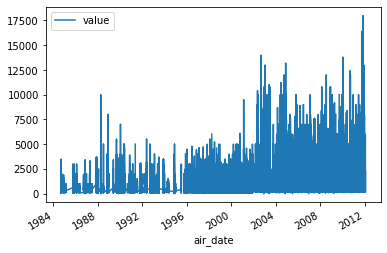

In [29]:
# Plot data with dates across the x-axis and question value on the y-axis
questions_dataframe.plot(x="air_date", y=["value"])

In [34]:
question_airing = questions_dataframe.iloc[:, 1].values
question_values = questions_dataframe.iloc[:, 3].values
question_airing

array(['1984-09-10T00:00:00.000000000', '1984-09-10T00:00:00.000000000',
       '1984-09-10T00:00:00.000000000', ...,
       '2012-01-27T00:00:00.000000000', '2012-01-27T00:00:00.000000000',
       '2012-01-27T00:00:00.000000000'], dtype='datetime64[ns]')